#### Grupo de Trabajo: Alejandro Hernández A. - Nicolás A. Morales D.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def numsin(num,x): # Defino la función numsin usado la forma recursiva sugerida en la sección 1,8 del libro de Landau.
    suma = x
    term = x
    i=2
    while (i <= num): 
        term = -term*float(x**2)/(float(2*i-1)*float(2*i-2)) # Uso el cast a float porque si dejo solo los paréntesis hace a un cast a int.
        suma += term
        i+=1
    return suma

In [9]:
def necTerms(x): # Defino la función que devuelve el número de términos necesarios en la serie de Maclaurin de sin(x) para tener un error menos a 0.1.
    i = 1
    err = 1.
    dif = 1.
    while (err > 0.01 and abs(dif) >= 10**(-20)): 
        dif = numsin(i+1,x)-numsin(i,x)
        err = abs(numsin(i,x)-np.sin(x))
        i+=1
    return i-1

Se usa `dif` porque se observó que para ciertos valores de x la función `numsin(num,x)` se quedaba estancada en un valor sin inmportar el número de términos tenidos en cuenta en la suma parcial. Esto se debe a dos tipos de error mencionados en el segundo capítulo del libro de Landau:

   - Error de aproximación: En este caso es claro que tenemos este tipo de error porque estamos aproximando una serie con una de sus sumas parciales. Al no tener en cuenta los valores de la cola de la serie se genera un error que en este caso no es muy grande, pero que sin embargo es superior al error deseado (a saber 0.01) para ciertos valores de x. En términos más usuales, es un error sistemático debido a la aproximación usada.
   
   - Error de redondeo: Dado a que solo estamos usando el número de decimales que por defecto arroja python para el manejo de `floats`, a partir de cierto número de pasos y para valores de x específicos, la función `numsin(num,x)` arroja el mismo valor en pantalla, indicando que las variaciones entre los valores de esta función son de un orden menor a 10⁻¹². Es por esto que es enecesario detener el método `necTerms(x)` cuando las variaciones entre los valores de `numsin(num,x)` son lo suficientemente pequeños.

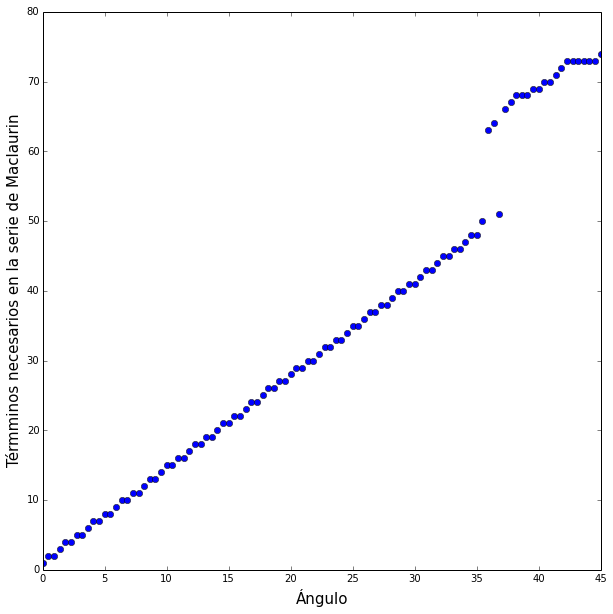

In [21]:
a = np.linspace(0.,45,100)
terms = []
for i in range(len(a)):
    terms.append(necTerms(a[i]))

plt.figure(figsize=(10,10))
plt.plot(a,terms,'bo')
plt.xlabel(u'Ángulo',fontsize=15)
plt.ylabel(u'Térmminos necesarios en la serie de Maclaurin',fontsize=15)
plt.show()

En la gráfica anterior se muestran el número de términos

In [11]:
b = np.linspace(0.,20,100)
pasos = range(1,31)
c = []
    
for i in range(1,31):
    for j in range(len(b)):
        c.append(numsin(i,b[j]))    

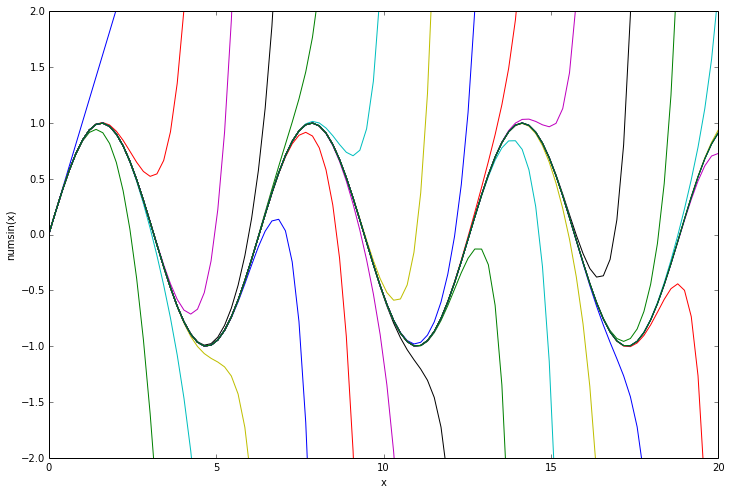

In [12]:
plt.figure(figsize=(12,8))
for i in range(30):
    plt.plot(b,c[i*100:(i+1)*100])
plt.xlabel('x')
plt.ylabel('numsin(x)')
plt.axis([0, 20, -2, 2])
plt.show()

La gráfica anterior muestra los valores que toma la función `numsin(num,x)` para los valores de `x` solicitados y para distintos números de pasos entre 1 y 30. Se evidencia claramente que el número de pasos juega un papel muy importante en la aproximación realizada, ya que para ciertos números de pasos la aproximación se sale del rango usual para la función `sin(x)`, dando indicios de posibles divergencias que se ven solventadas al tener en cuenta más términos en la serie.